In [148]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [34]:
df_market_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
cluster_id                        int32
dtype: object

In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [37]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(df_market_data)


In [51]:
# Create a DataFrame with the scaled data
scaled_data_df=pd.DataFrame(scaled_data,
                            columns=df_market_data.columns)
scaled_data_df
# Copy the crypto names from the original data
scaled_data_df["coin_id"] = df_market_data.index

# Set the coinid column as index
scaled_data_df=scaled_data_df.set_index('coin_id')

# Display sample data
scaled_data_df.head(10)
#scaled_data_names

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_id
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,-0.214286
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,-0.214286
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,-0.214286
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,-0.214286
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,-0.214286
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,-0.214286
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,-0.214286
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,-0.214286
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,-0.214286


---

### Find the Best Value for k Using the Original Data.

In [17]:
# Create a list with the number of k-values from 1 to 11
k=range(1,12)
list(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [23]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled` -> aka learn from the data
# 3. Append the model.inertia_ to the inertia list
       
for each_k in k:
       model=KMeans(n_clusters=each_k)
       model.fit(df_market_data)
       inertia.append(model.inertia_)
        
inertia


[69983546.58334066,
 8193207.493539454,
 2592706.8825531793,
 835227.4380640758,
 437329.5311132971,
 271789.8712142686,
 199892.12093712593,
 157329.52476206073,
 118743.87920655252,
 93040.66565973038,
 73900.451181045]

In [31]:
# Create a dictionary with the data to plot the Elbow curve
dict_inertia={'k':k,'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df=pd.DataFrame(dict_inertia)
elbow_df

,k,inertia
0,1,6.998355e+07
1,2,8.193207e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.373295e+05
5,6,2.717899e+05
6,7,1.998921e+05
7,8,1.573295e+05
8,9,1.187439e+05
9,10,9.304067e+04


In [139]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
original_curve = elbow_df.hvplot(x='k', y='inertia', title='Elbow Curve (K Mean)')
original_curve

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** when k=2 because that is where the most significant reduction of inertia is at (8.2 x 10^6)

---

### Cluster Cryptocurrencies with K-means Using the Original Data

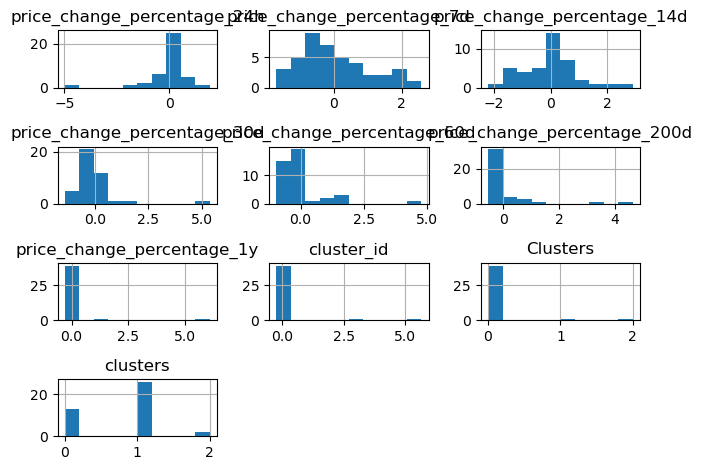

In [155]:
# Initialize the K-Means model using the best value for k
scaled_data_df.hist()
plt.tight_layout()

In [73]:
# Fit the K-Means model using the scaled data
km=KMeans(n_clusters=3)
km.fit(scaled_data_df)

KMeans(n_clusters=3)

In [74]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_id=km.predict(scaled_data_df)

# Print the resulting array of cluster values.
cluster_id

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1],
      dtype=int32)

In [75]:
# Create a copy of the DataFrame
scaled_data_df['clusters']=cluster_id

In [76]:
# Add a new column to the DataFrame with the predicted clusters
# Display sample data
scaled_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_id,Clusters,clusters
coin_id,,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,-0.214286,0,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,-0.214286,0,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,-0.214286,0,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,-0.214286,0,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,-0.214286,0,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,-0.214286,0,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,-0.214286,0,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,-0.214286,0,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,-0.214286,0,0


In [77]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scaled_scatter_plot=scaled_data_df.hvplot.scatter(
             x='price_change_percentage_24h',
             y='price_change_percentage_7d',
             title = "Cryptocurrency by Similarities (K-Means)",
             hover_cols='coin_id',
             by='clusters')
scaled_scatter_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [63]:
px.scatter_3d(data_frame=scaled_data_df,
             x='price_change_percentage_24h',
             y='price_change_percentage_7d',
             z='price_change_percentage_14d',
             color='cluster_id')

---

### Optimize Clusters with Principal Component Analysis.

In [82]:
# Create a PCA model instance and set `n_components=3`.
instance_pca = PCA(n_components = 3)

In [86]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_scaled_data=instance_pca.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame. 
pca_scaled_data[0:5]

array([[-0.49777143, -1.08021507,  0.55244758],
       [-0.51208522, -0.69218027,  1.04552244],
       [-0.43919521,  0.08685356, -0.73018991],
       [-0.48720224,  0.11944822, -0.58280415],
       [-0.67850544, -2.41026609,  1.78782956]])

In [89]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
instance_pca.explained_variance_ratio_


array([0.42572644, 0.30183453, 0.16028195])

In [90]:
instance_pca.explained_variance_ratio_.sum()

0.8878429150709867

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8878

In [96]:
# Create a new DataFrame with the PCA data.
pca_scaled_data_df=pd.DataFrame(pca_scaled_data,columns=['PCA1','PCA2','PCA3'])

# Copy the crypto names from the original data
pca_scaled_data_df["coin_id"] = df_market_data.index

# Set the coinid column as index
pca_scaled_data_df=pca_scaled_data_df.set_index('coin_id')

# Display sample data
pca_scaled_data_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.497771,-1.080215,0.552448
ethereum,-0.512085,-0.692180,1.045522
tether,-0.439195,0.086854,-0.730190
ripple,-0.487202,0.119448,-0.582804
bitcoin-cash,-0.678505,-2.410266,1.787830
binancecoin,-0.309756,-1.564601,0.885383
chainlink,-0.573897,-0.797682,2.843494
cardano,-0.371962,-0.920997,1.555088
litecoin,-0.653606,-0.720673,0.684155


---

### Find the Best Value for k Using the PCA Data

In [107]:
# Create a list with the number of k-values to try
# We use a range from 1 to 11

p = list(range(1,12))
p

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [108]:

# Create an empy list to store the inertia values
pca_inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for each_p in p:
       model_pca=KMeans(n_clusters=each_p)
       model_pca.fit(pca_scaled_data_df)
       pca_inertia.append(model_pca.inertia_)
        
pca_inertia

[306.1542227627706,
 196.95401202322444,
 94.36122405590413,
 42.170419543911194,
 31.59005181569441,
 24.512098664842554,
 18.139993972856107,
 14.706818288622802,
 11.684052884593166,
 9.011681214023884,
 7.157477180167242]

In [143]:
# Create a dictionary with the data to plot the Elbow curve
dict_pca={'p':p,'pca inertia':pca_inertia}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df=pd.DataFrame(dict_pca)
pca_elbow_df

,p,pca inertia
0,1,306.154223
1,2,196.954012
2,3,94.361224
3,4,42.170420
4,5,31.590052
5,6,24.512099
6,7,18.139994
7,8,14.706818
8,9,11.684053
9,10,9.011681


In [144]:
pca_scaled_curve = pca_elbow_df.hvplot(x='p', y='pca inertia', title='Elbow Curve (PCA)')
pca_scaled_curve

:Curve   [p]   (pca inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** when p=2 because that is where the inertia decreases the most at 196


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no, it is it the same at p=2

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [120]:
# Initialize the K-Means model using the best value for k
km=KMeans(n_clusters=3)

In [121]:
# Fit the K-Means model using the PCA data
km.fit(pca_scaled_data_df)

KMeans(n_clusters=3)

In [122]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_cluster_id=km.predict(pca_scaled_data_df)

# Print the resulting array of cluster values.
pca_cluster_id

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [123]:
# Add a new column to the DataFrame with the predicted clusters
pca_scaled_data_df['pca clusters']=pca_cluster_id

# Display sample data
pca_scaled_data_df.head(10)

,PCA1,PCA2,PCA3,pca clusters
coin_id,,,,
bitcoin,-0.497771,-1.080215,0.552448,0
ethereum,-0.512085,-0.692180,1.045522,0
tether,-0.439195,0.086854,-0.730190,0
ripple,-0.487202,0.119448,-0.582804,0
bitcoin-cash,-0.678505,-2.410266,1.787830,0
binancecoin,-0.309756,-1.564601,0.885383,0
chainlink,-0.573897,-0.797682,2.843494,0
cardano,-0.371962,-0.920997,1.555088,0
litecoin,-0.653606,-0.720673,0.684155,0


In [129]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_scaled_scatter_plot=pca_scaled_data_df.hvplot.scatter(
             x='PCA1',
             y='PCA3',
             title = "Cryptocurrency by Similarities (K-Means)",
             hover_cols='coin_id',
             by='pca clusters')
pca_scaled_scatter_plot

:NdOverlay   [pca clusters]
   :Scatter   [PCA1]   (PCA3,coin_id)

In [130]:
px.scatter_3d(data_frame=pca_scaled_data_df,
             x='PCA1',
             y='PCA2',
             z='PCA3',
             color='pca clusters')

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [145]:
# Composite plot to contrast the Elbow curves
original_curve + pca_scaled_curve

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [p]   (pca inertia)

In [146]:
# Composite plot to contrast the clusters
scaled_scatter_plot + pca_scaled_scatter_plot

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [pca clusters]
      :Scatter   [PCA1]   (PCA3,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Reduces the level of inertia (as shown when inertia declined form 8.2 x 10^6 to only 192). Using PCA, althought fewer data points, the optimization level remains the same which follows the principle of dimensionality reduction. PCA's data is more closely gathered together and easily visualized outliers. 